# Data Analysis & Predictive Model Building
***
#### By Omar BOUGACHA



## Introduction
***

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/patient-survey-score-with-demographics/pxdata.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
base_color = sns.color_palette()[0]

## Data Wrangling

### Data Gathering

In [3]:
data_df = pd.read_csv('/kaggle/input/patient-survey-score-with-demographics/pxdata.csv')
data_df.head(2)

,Survey,Composite,Perfect,Rate,Recommend,Date,Health,Mental,College,White,English,Service,Specialty,Unit,Sex,Source,Home,Age,Stay,Visit
0,1,88.888889,0,11,4,12/24/2015,5,5,Y,N,Y,M,39,10,F,D,Y,18-34,2+,0
1,2,50.000000,0,6,3,1/6/2015,4,4,N,Y,Y,S,39,20,F,D,Y,50-64,2+,0


Lets go for the data quality and tidiness assessment.

### Data Quality & Tidiness Assessment

#### Data Completness (Missing values)

In [4]:
data_df.isnull().sum()

Survey       0
Composite    0
Perfect      0
Rate         0
Recommend    0
Date         0
Health       0
Mental       0
College      0
White        0
English      0
Service      8
Specialty    0
Unit         0
Sex          0
Source       0
Home         0
Age          0
Stay         0
Visit        0
dtype: int64

As we can see, all the records are given in this dataset. We do not have any missing values.

#### Data Accuracy 

Accurate data should present the right values in the right format. Since we cannot cross-reference the given values to other sources of data, we only check the right format of the data. 

In [5]:
data_df.dtypes

Survey         int64
Composite    float64
Perfect        int64
Rate           int64
Recommend      int64
Date          object
Health         int64
Mental         int64
College       object
White         object
English       object
Service       object
Specialty      int64
Unit           int64
Sex           object
Source        object
Home          object
Age           object
Stay          object
Visit          int64
dtype: object

As we can see we have some data accuracy issues: 
* The Date feature should be of type datetime not string. 
* Perfect, College, White, and English should be of type boolean. 
* Age and Stay should be categorical

#### Data Consistency: 

We check for each feature if the data points present different values for the same meaning.

In [6]:
data_df.nunique()

Survey       950
Composite    111
Perfect        2
Rate          11
Recommend      4
Date         338
Health         5
Mental         5
College        2
White          2
English        2
Service        3
Specialty      7
Unit          15
Sex            2
Source         2
Home           3
Age            6
Stay           4
Visit          2
dtype: int64

In [7]:
data_df['Perfect'].value_counts()

0    796
1    154
Name: Perfect, dtype: int64

In [8]:
data_df['Rate'].value_counts()

11    462
10    216
9     148
8      50
6      23
7      19
5      11
4       9
1       8
3       2
2       2
Name: Rate, dtype: int64

In [9]:
data_df['Recommend'].value_counts()

4    728
3    180
2     25
1     17
Name: Recommend, dtype: int64

In [10]:
data_df['Health'].value_counts()

4    314
3    282
5    176
2    140
1     38
Name: Health, dtype: int64

In [11]:
data_df['Mental'].value_counts()

5    365
4    318
3    197
2     63
1      7
Name: Mental, dtype: int64

In [12]:
data_df['College'].value_counts()

Y    626
N    324
Name: College, dtype: int64

In [13]:
data_df['White'].value_counts()

Y    857
N     93
Name: White, dtype: int64

In [14]:
data_df['English'].value_counts()

Y    865
N     85
Name: English, dtype: int64

In [15]:
data_df['Service'].value_counts()

M    623
S    237
O     82
Name: Service, dtype: int64

In [16]:
data_df['Specialty'].value_counts()

1     540
39    221
2     117
8      61
15      6
54      3
5       2
Name: Specialty, dtype: int64

In [17]:
data_df['Unit'].value_counts()

10    210
24    132
18    117
8      99
9      96
4      89
25     77
7      70
28     27
20     10
11     10
26      7
3       3
21      2
23      1
Name: Unit, dtype: int64

In [18]:
data_df['Source'].value_counts()

T    599
D    351
Name: Source, dtype: int64

In [19]:
data_df['Home'].value_counts()

Y    589
S    326
N     35
Name: Home, dtype: int64

In [20]:
data_df['Age'].unique()

array(['18-34', '50-64', '35-49', '65-79', '80+', '80-90'], dtype=object)

We can see in the age values we have two categories that mean the same thing 80+ and 80-90. I believe the 80+ is just a mistyping error. Therefore, it should be fixed to 90+

In [21]:
data_df['Stay'].unique()

array(['2+', '4+', '1', '8+'], dtype=object)

The stay categories should be defined as: '1', '2-3', '4-7', '8+'

In [22]:
data_df['Visit'].unique()

array([0, 1])

### Data Cleaning

In [23]:
cleaned_data = data_df.copy()

* The Date feature should be of type datetime not string. 

##### Define: 
* convert the type from string to datetime

##### Code:

In [24]:
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

##### Test:

In [25]:
cleaned_data.dtypes

Survey                int64
Composite           float64
Perfect               int64
Rate                  int64
Recommend             int64
Date         datetime64[ns]
Health                int64
Mental                int64
College              object
White                object
English              object
Service              object
Specialty             int64
Unit                  int64
Sex                  object
Source               object
Home                 object
Age                  object
Stay                 object
Visit                 int64
dtype: object

* Perfect, College, White, and English should be of type boolean. 

##### Define: 
* convert the type from string to boolean

##### Code:

In [26]:
cleaned_data['Perfect'] = cleaned_data['Perfect'].apply(lambda x : True if x==1 else False)
cleaned_data['College'] = cleaned_data['College'].apply(lambda x : True if x=='Y' else False)
cleaned_data['White'] = cleaned_data['White'].apply(lambda x : True if x=='Y' else False)
cleaned_data['English'] = cleaned_data['English'].apply(lambda x : True if x=='Y' else False)

##### Test

In [27]:
cleaned_data.dtypes

Survey                int64
Composite           float64
Perfect                bool
Rate                  int64
Recommend             int64
Date         datetime64[ns]
Health                int64
Mental                int64
College                bool
White                  bool
English                bool
Service              object
Specialty             int64
Unit                  int64
Sex                  object
Source               object
Home                 object
Age                  object
Stay                 object
Visit                 int64
dtype: object

* the Stay categories: 

##### define: 
* Change the stay categories to: '1', '2-3', '4-7', '8+'

##### Code:

In [28]:
cleaned_data['Stay'] = cleaned_data['Stay'].replace({'2+':'2-3', '4+': '4-7'})

##### Test:

In [29]:
cleaned_data['Stay'].unique()

array(['2-3', '4-7', '1', '8+'], dtype=object)

* 80+ and 80-90 category. 

##### Define: 
* Change the 80+ category to 90+

##### Code: 


In [30]:
cleaned_data['Age'] = cleaned_data["Age"].apply(lambda x: '90+' if x=='80+' else x)

##### Test

In [31]:
cleaned_data['Age'].unique()

array(['18-34', '50-64', '35-49', '65-79', '90+', '80-90'], dtype=object)

* Age should be categorical

##### Define:
* Change Age to categorical type

##### Code:

In [32]:
from pandas.api.types import CategoricalDtype
age_cat = CategoricalDtype(['18-34', '35-49', '50-64', '65-79', '80-90', '90+'], ordered=True)

In [33]:
cleaned_data['Age'] = cleaned_data['Age'].astype(age_cat)

##### Test

In [34]:
cleaned_data['Age'].dtype

CategoricalDtype(categories=['18-34', '35-49', '50-64', '65-79', '80-90', '90+'], ordered=True)

* Stay should be categorical

##### Define:
* Change Stay type from string to categorical:

##### Code:

In [35]:
stay_cat = CategoricalDtype(['1', '2-3', '4-7', '8+'], ordered=True)
cleaned_data['Stay'] = cleaned_data['Stay'].astype(stay_cat)

##### Test:

In [36]:
cleaned_data.dtypes

Survey                int64
Composite           float64
Perfect                bool
Rate                  int64
Recommend             int64
Date         datetime64[ns]
Health                int64
Mental                int64
College                bool
White                  bool
English                bool
Service              object
Specialty             int64
Unit                  int64
Sex                  object
Source               object
Home                 object
Age                category
Stay               category
Visit                 int64
dtype: object

## Exploratory Data Analysis

In the EDA process, we continue working using the cleaned_data table to analyze the different relationships between the variables. The EDA process has 3 main components: 
* Univariate Analysis
* Bivariate Analysis 
* Multivariate Analysis

However, in this analysis, we focuse only on univariate and bivariate analysis.

### Univariate Analysis

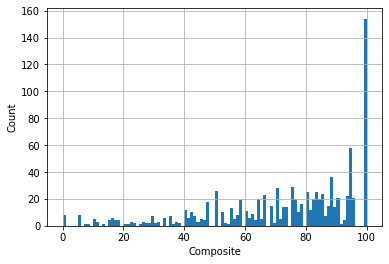

In [37]:
cleaned_data['Composite'].hist(bins=100)
plt.xlabel('Composite')
plt.ylabel('Count')
plt.show()

We can see that the composite feature is highly skewed to the left.

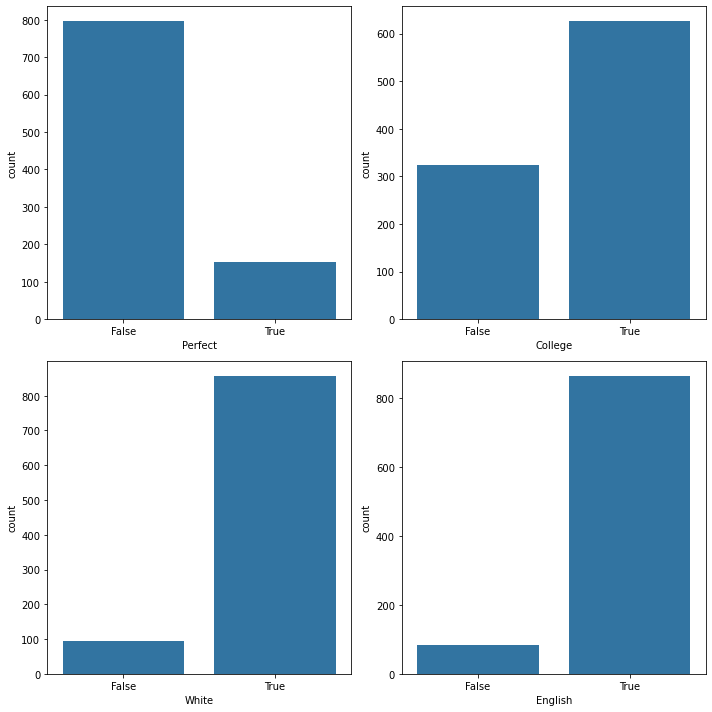

In [38]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
sns.countplot(x='Perfect', data=cleaned_data, ax=ax1, color=base_color)
sns.countplot(x='College', data=cleaned_data, ax=ax2, color=base_color)
sns.countplot(x='White', data=cleaned_data, ax=ax3, color=base_color)
sns.countplot(x='English', data=cleaned_data, ax=ax4, color=base_color)
plt.tight_layout()
plt.show()

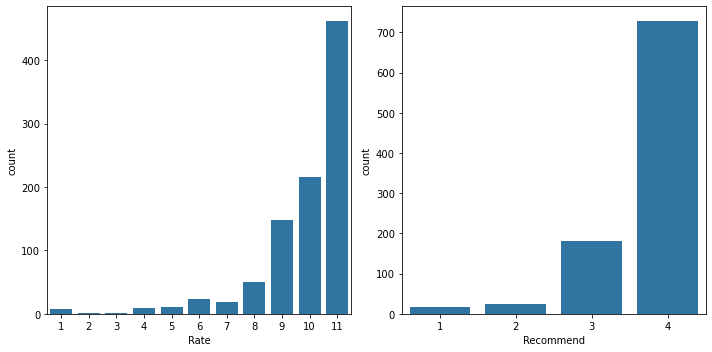

In [39]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(x='Rate', data=cleaned_data, ax=ax1, color=base_color)
sns.countplot(x='Recommend', data=cleaned_data, ax=ax2, color=base_color)
plt.tight_layout()
plt.show()

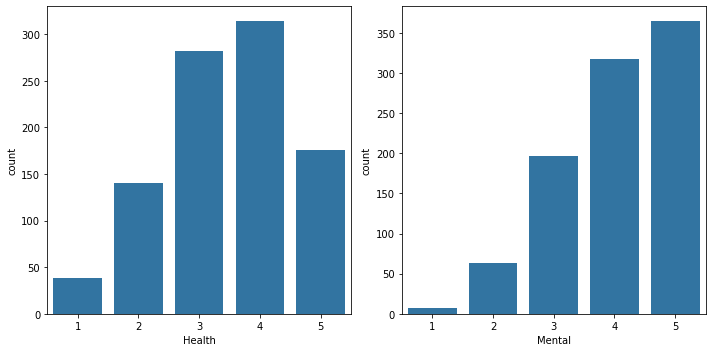

In [40]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(x='Health', data=cleaned_data, ax=ax1, color=base_color)
sns.countplot(x='Mental', data=cleaned_data, ax=ax2, color=base_color)
plt.tight_layout()
plt.show()

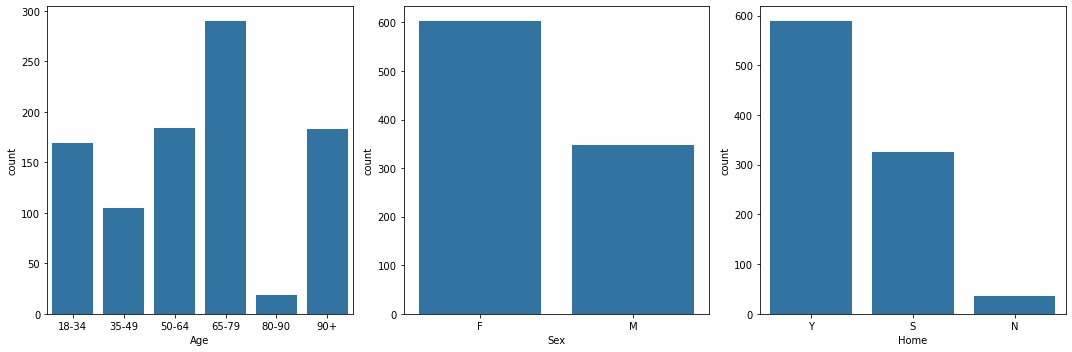

In [41]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.countplot(x='Age', data=cleaned_data, ax=ax1, color=base_color)
sns.countplot(x='Sex', data=cleaned_data, ax=ax2, color=base_color)
sns.countplot(x='Home', data=cleaned_data, ax=ax3, color=base_color)
plt.tight_layout()
plt.show()

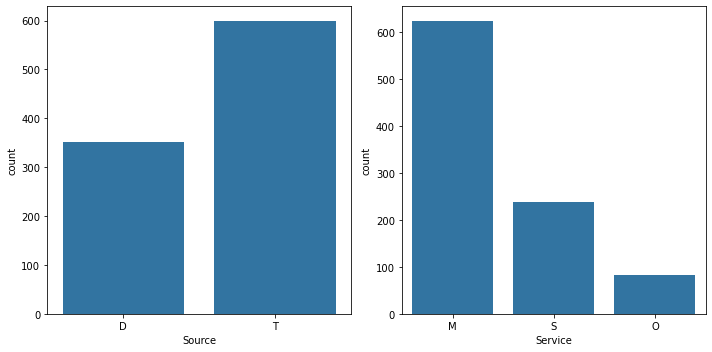

In [42]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(x='Source', data=cleaned_data, ax=ax1, color=base_color)
sns.countplot(x='Service', data=cleaned_data, ax=ax2, color=base_color)
plt.tight_layout()
plt.show()

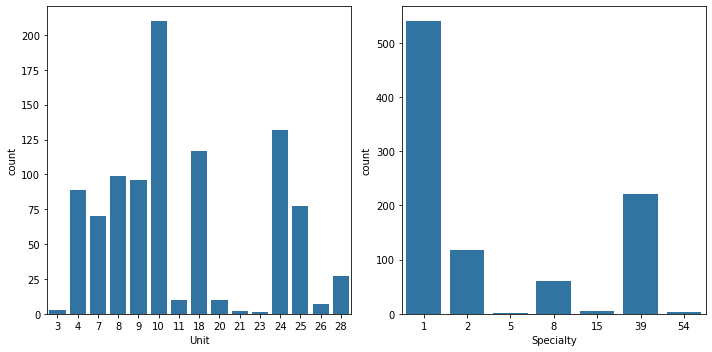

In [43]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(x='Unit', data=cleaned_data, ax=ax1, color=base_color)
sns.countplot(x='Specialty', data=cleaned_data, ax=ax2, color=base_color)
plt.tight_layout()
plt.show()

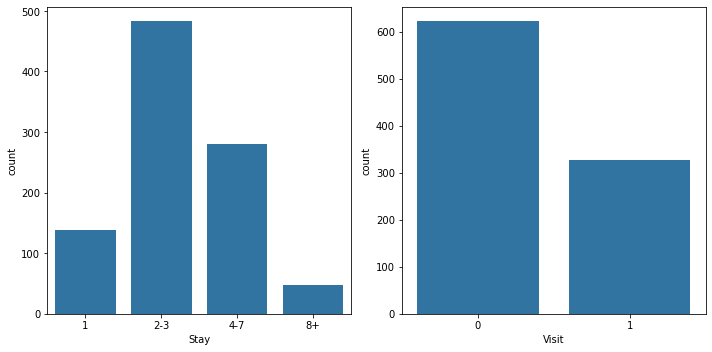

In [44]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(x='Stay', data=cleaned_data, ax=ax1, color=base_color)
sns.countplot(x='Visit', data=cleaned_data, ax=ax2, color=base_color)
plt.tight_layout()
plt.show()

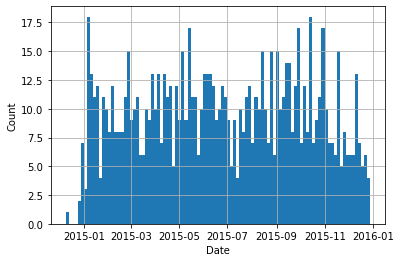

In [45]:
cleaned_data['Date'].hist(bins=100)
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

This feature of the date allows us to derive other features and to study them. We can most likely derive the month feature and the day of week. 

#### Feature Engineering:

##### Define: 
* From Date extract the Month Name
* From Date extract the Day-of-Week

##### Code: 

In [46]:
cleaned_data['Month'] = cleaned_data['Date'].apply(lambda x : x.strftime("%B"))

In [47]:
cleaned_data['Day_of_Week'] = cleaned_data['Date'].apply(lambda x: x.strftime("%A"))

Lets change them to categorical type:

In [48]:
m_cat = CategoricalDtype(['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                          'August', 'September', 'October', 'November', 'December'], ordered=True)
d_w_cat = CategoricalDtype(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                            'Saturday', 'Sunday'], ordered=True)

In [49]:
cleaned_data['Month'] = cleaned_data['Month'].astype(m_cat)
cleaned_data['Day_of_Week'] = cleaned_data['Day_of_Week'].astype(d_w_cat)

##### Test: 

In [50]:
cleaned_data['Month'].unique()

[December, January, August, May, October, ..., September, March, November, April, June]
Length: 12
Categories (12, object): [January < February < March < April ... September < October < November < December]

In [51]:
cleaned_data['Day_of_Week'].unique()

[Thursday, Tuesday, Saturday, Wednesday, Monday, Friday, Sunday]
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

Lets now plot their bar plot.

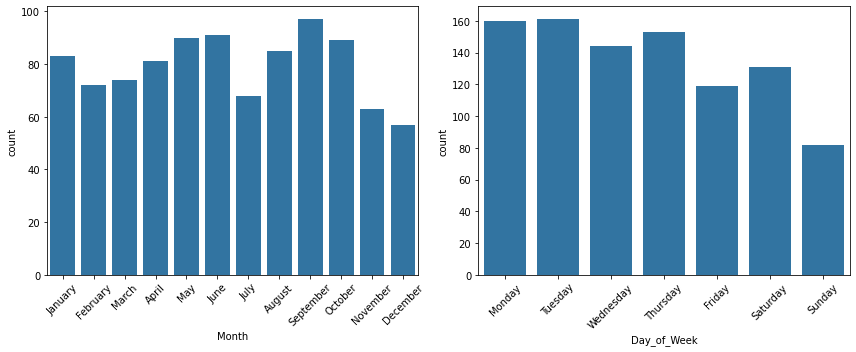

In [52]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ch1 = sns.countplot(x='Month', data=cleaned_data, ax=ax1, color=base_color)
ch1.set_xticklabels(labels = ch1.get_xticklabels(), rotation=45)
ch2 = sns.countplot(x='Day_of_Week', data=cleaned_data, ax=ax2, color=base_color)
ch2.set_xticklabels(labels = ch2.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

### Bivariate Analysis

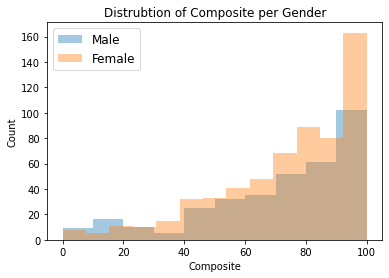

In [53]:
d_m = cleaned_data[cleaned_data['Sex']=='M']
sns.distplot(d_m['Composite'],kde=False, label='Male')
d_f = cleaned_data[cleaned_data['Sex']=='F']
sns.distplot(d_f['Composite'],kde=False, label='Female')
plt.legend(prop={'size': 12})
plt.title('Distrubtion of Composite per Gender')
plt.xlabel('Composite')
plt.ylabel('Count')
plt.show()

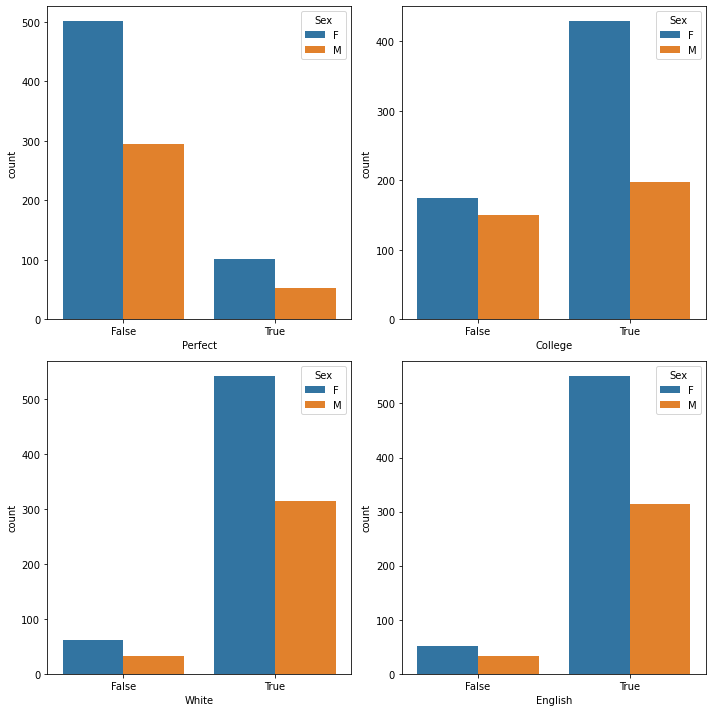

In [54]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
sns.countplot(x='Perfect', data=cleaned_data, ax=ax1, hue='Sex')
sns.countplot(x='College', data=cleaned_data, ax=ax2, hue='Sex')
sns.countplot(x='White', data=cleaned_data, ax=ax3, hue='Sex')
sns.countplot(x='English', data=cleaned_data, ax=ax4, hue='Sex')
plt.tight_layout()
plt.show()

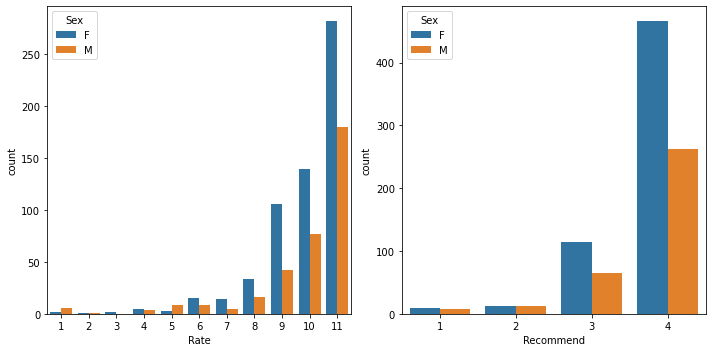

In [55]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(x='Rate', data=cleaned_data, ax=ax1, hue='Sex')
sns.countplot(x='Recommend', data=cleaned_data, ax=ax2, hue='Sex')
plt.tight_layout()
plt.show()

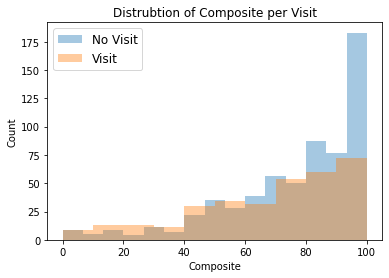

In [56]:
d_m = cleaned_data[cleaned_data['Visit']==0]
sns.distplot(d_m['Composite'],kde=False, label='No Visit')
d_f = cleaned_data[cleaned_data['Visit']==1]
sns.distplot(d_f['Composite'],kde=False, label='Visit')
plt.legend(prop={'size': 12})
plt.title('Distrubtion of Composite per Visit')
plt.xlabel('Composite')
plt.ylabel('Count')
plt.show()

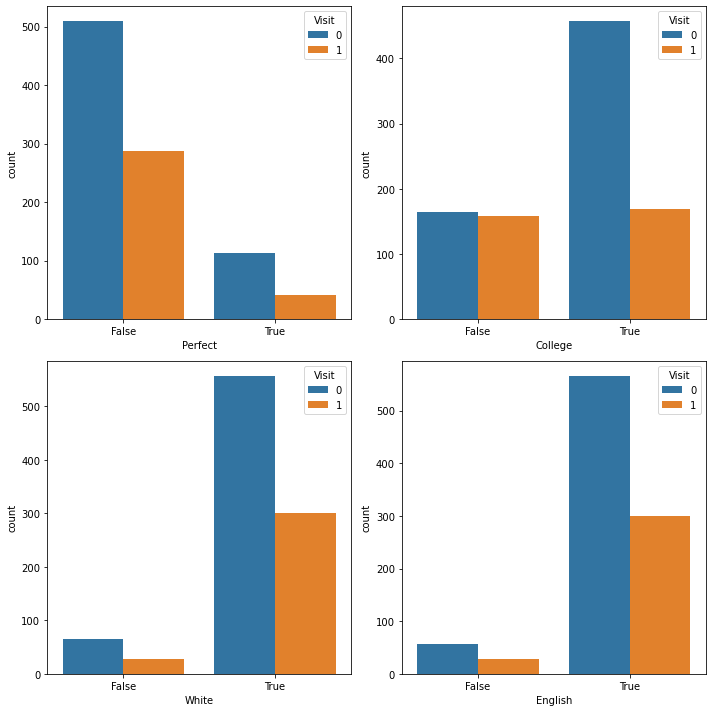

In [57]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
sns.countplot(x='Perfect', data=cleaned_data, ax=ax1, hue='Visit')
sns.countplot(x='College', data=cleaned_data, ax=ax2, hue='Visit')
sns.countplot(x='White', data=cleaned_data, ax=ax3, hue='Visit')
sns.countplot(x='English', data=cleaned_data, ax=ax4, hue='Visit')
plt.tight_layout()
plt.show()

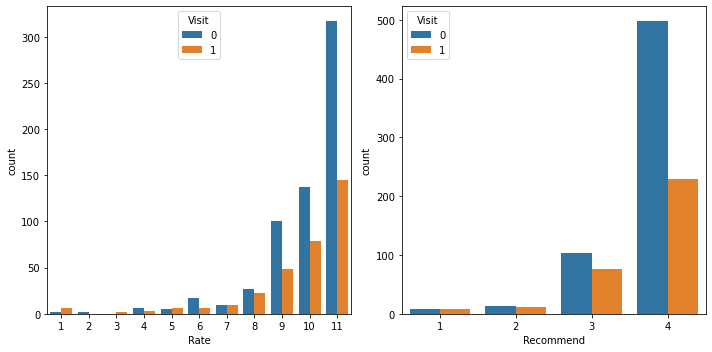

In [58]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(x='Rate', data=cleaned_data, ax=ax1, hue='Visit')
sns.countplot(x='Recommend', data=cleaned_data, ax=ax2, hue='Visit')
plt.tight_layout()
plt.show()

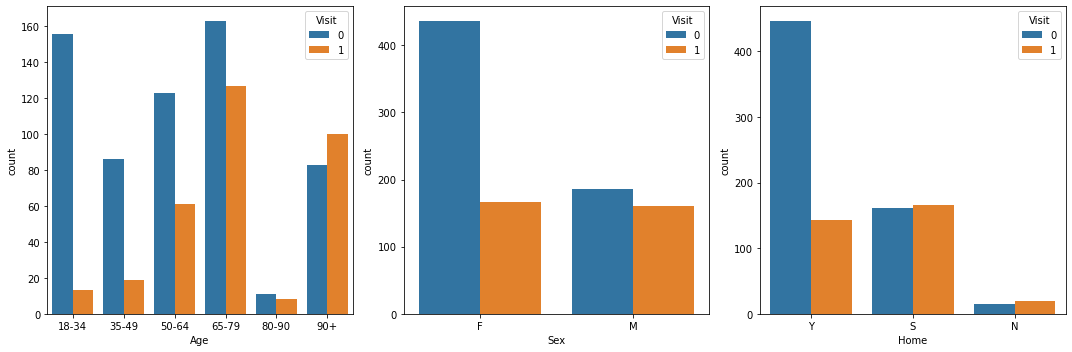

In [59]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.countplot(x='Age', data=cleaned_data, ax=ax1, hue='Visit')
sns.countplot(x='Sex', data=cleaned_data, ax=ax2, hue='Visit')
sns.countplot(x='Home', data=cleaned_data, ax=ax3, hue='Visit')
plt.tight_layout()
plt.show()

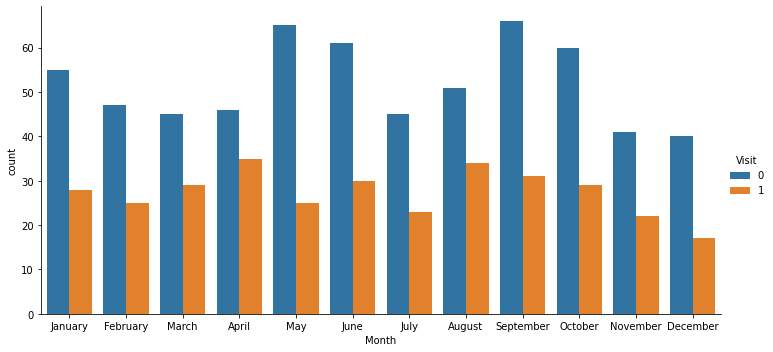

In [60]:
sns.catplot(x='Month', data=cleaned_data, kind='count', hue='Visit', aspect=2)
plt.show()

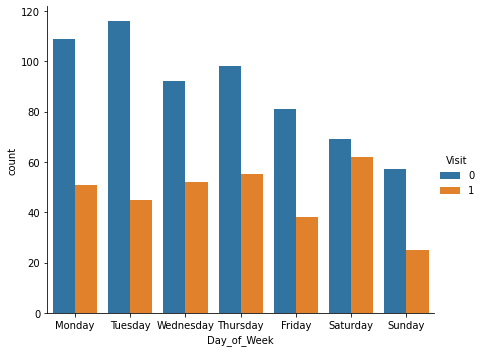

In [61]:
sns.catplot(x='Day_of_Week', kind='count', data=cleaned_data, hue='Visit', aspect=1.2)
plt.show()

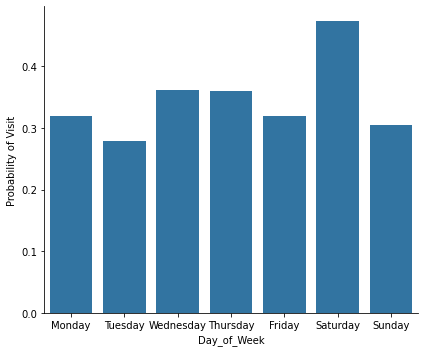

In [62]:
sns.catplot(x='Day_of_Week', data=cleaned_data, y='Visit', kind='bar', aspect=1.2, ci=None, color=base_color)
plt.ylabel('Probability of Visit')
plt.show()

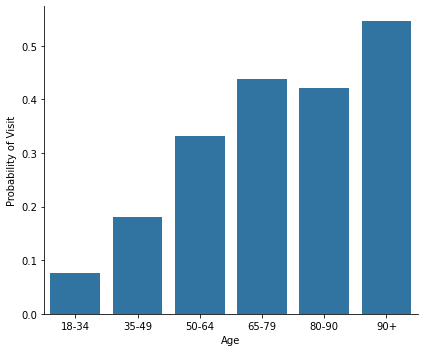

In [63]:
sns.catplot(x='Age', data=cleaned_data, y='Visit', kind='bar', aspect=1.2, ci=None, color=base_color)
plt.ylabel('Probability of Visit')
plt.show()

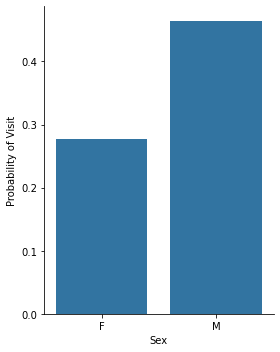

In [64]:
sns.catplot(x='Sex', data=cleaned_data, y='Visit', kind='bar', aspect=0.8, ci=None, color=base_color)
plt.ylabel('Probability of Visit')
plt.show()

We can see that the gender has an influence on the Visit status. Lets verify if this observation is statistically significant or not. 

The null hypothesis in this case is that the probablity (ratio) of visit if the gender is Female is the same as the Male: 
$$H_0: p_{F} = p_{M}$$ 

The $H_1$ is that the gender has an influence. 
$$H_1: p_{F} \neq p_{M}$$

In [65]:
import statsmodels.api as sm
female = cleaned_data[cleaned_data['Sex']=='F']
male = cleaned_data[cleaned_data['Sex']=='M']
counts = np.array([female['Visit'].sum(), 
                   male['Visit'].sum()])
nobs = np.array([female.shape[0], male.shape[0]])
zstat, pval = sm.stats.proportions_ztest(counts, nobs, alternative='smaller')
zstat, pval

(-5.837952212106604, 2.6423154439254327e-09)

We can see that the p-value is so small (lower than 0.05). Hence, we succeeded in rejecting the null hypothesis. Therefore, **the gender has an influence of the visit outcome**.

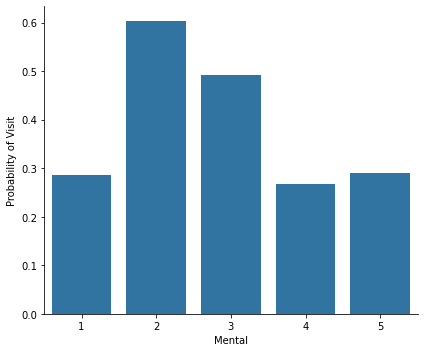

In [66]:
sns.catplot(x='Mental', data=cleaned_data, y='Visit', kind='bar', aspect=1.2, ci=None, color=base_color)
plt.ylabel('Probability of Visit')
plt.show()

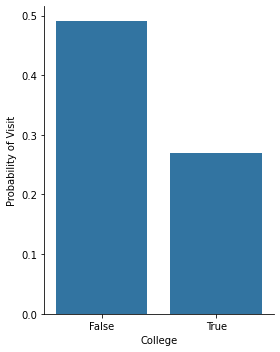

In [67]:
sns.catplot(x='College', data=cleaned_data, y='Visit', kind='bar', aspect=0.8, ci=None, color=base_color)
plt.ylabel('Probability of Visit')
plt.show()

Lets do the statistical test for this feature also. 

The null hypothesis in this case is that the probablity (ratio) of visit if the college is True is the same as the False: 
$$H_0: p_{F} = p_{T}$$ 

The $H_1$ is that the college has an influence. 
$$H_1: p_{F} \neq p_{T}$$

In [68]:
collage = cleaned_data[cleaned_data['College']]
no_collage = cleaned_data[cleaned_data['College']==False]
counts = np.array([collage['Visit'].sum(), 
                   no_collage['Visit'].sum()])
nobs = np.array([collage.shape[0], no_collage.shape[0]])
zstat, pval = sm.stats.proportions_ztest(counts, nobs, alternative='smaller')
zstat, pval

(-6.784763420415986, 5.81384468644381e-12)

The obtained p-value is lower than 0.05. Then, we can safely reject the null hypothesis. Therefore, **the college status has an influence over the visit outcome**.

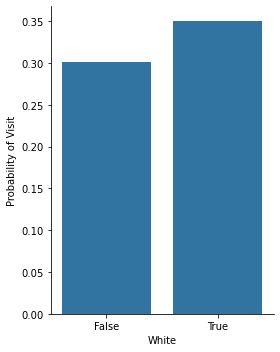

In [69]:
sns.catplot(x='White', data=cleaned_data, y='Visit', kind='bar', aspect=0.8, ci=None, color=base_color)
plt.ylabel('Probability of Visit')
plt.show()

Lets do the statistical test for this feature also. 

The null hypothesis in this case is that the probablity (ratio) of visit if the white is True is the same as the False: 
$$H_0: p_{F} = p_{T}$$ 

The $H_1$ is that the white has an influence. 
$$H_1: p_{F} \neq p_{T}$$

In [70]:
co = cleaned_data[cleaned_data['White']]
no = cleaned_data[cleaned_data['White']==False]
counts = np.array([co['Visit'].sum(), 
                   no['Visit'].sum()])
nobs = np.array([co.shape[0], no.shape[0]])
zstat, pval = sm.stats.proportions_ztest(counts, nobs, alternative='smaller')
zstat, pval

(0.9436427600534665, 0.8273238832610508)

We can see that the p-value for this feature is equal to 0.82. Then, $p-value > 0.05$. So we fail to reject the null hypothesis. Hence, **the white or no white does not influence the visit outcome**.

In [71]:
cleaned_data.corr()

,Survey,Composite,Perfect,Rate,Recommend,Health,Mental,College,White,English,Specialty,Unit,Visit
Survey,1.000000,-0.130091,-0.086734,-0.049551,-0.077368,-0.338575,-0.189398,-0.197478,0.037386,0.023688,-0.539227,0.211268,0.270656
Composite,-0.130091,1.000000,0.486817,0.667853,0.668381,0.304673,0.286247,0.064606,-0.026486,-0.032156,0.180980,-0.187392,-0.161704
Perfect,-0.086734,0.486817,1.000000,0.258999,0.214381,0.194182,0.141524,-0.014929,-0.028105,-0.032232,0.109630,-0.085911,-0.073111
Rate,-0.049551,0.667853,0.258999,1.000000,0.750540,0.197541,0.196124,-0.038537,-0.033618,-0.034509,0.039644,-0.107829,-0.088462
Recommend,-0.077368,0.668381,0.214381,0.750540,1.000000,0.237462,0.213459,0.055483,-0.020478,-0.019094,0.117063,-0.128136,-0.113022
Health,-0.338575,0.304673,0.194182,0.197541,0.237462,1.000000,0.568119,0.288219,-0.075647,-0.064309,0.455834,-0.240402,-0.318065
Mental,-0.189398,0.286247,0.141524,0.196124,0.213459,0.568119,1.000000,0.182993,-0.066171,-0.038858,0.214903,-0.117784,-0.184966
College,-0.197478,0.064606,-0.014929,-0.038537,0.055483,0.288219,0.182993,1.000000,0.009580,0.038979,0.346085,-0.133505,-0.220127
White,0.037386,-0.026486,-0.028105,-0.033618,-0.020478,-0.075647,-0.066171,0.009580,1.000000,0.728210,-0.022607,-0.006775,0.030616
English,0.023688,-0.032156,-0.032232,-0.034509,-0.019094,-0.064309,-0.038858,0.038979,0.728210,1.000000,-0.025017,0.017805,0.002694


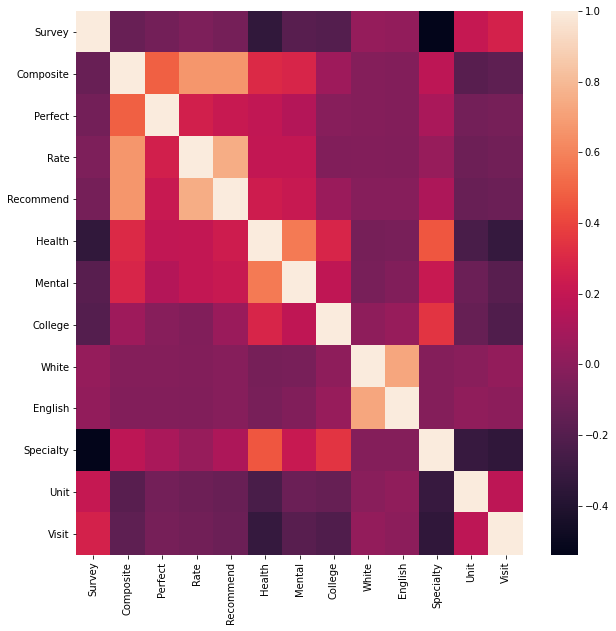

In [72]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
sns.heatmap(cleaned_data.corr(), ax=ax);

We can see from the correlation heatmap and the matrix that we have two highly correlated couple of features: 
* the Rate and Recommend
* the White and English

## Modeling:
*********

In this project, we suppose that we want to build a model that is able to predict the visit outcome. Hence, we have a binary classification problem. The features, in this work, come in different types (categorical, integer, boolean, and float). Therefore, we should start by preparing the data for the model building. 

### Data Preparation:

In [73]:
y = cleaned_data['Visit']
X = cleaned_data[[x for x in cleaned_data.columns if x not in ['Survey', 'Visit', 'Date']]]

* Transforming the boolean columns into binary (0,1)

In [74]:
X['White'] = X['White'].astype('int32')
X['College'] = X['College'].astype('int32')
X['English'] = X['English'].astype('int32')
X['Perfect'] = X['Perfect'].astype('int32')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

* Transforming Sex to binary (0 for F, 1 for M)

In [75]:
X['Sex'] = X['Sex'].replace({'F':0, 'M':1})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


* Transfroming Source to binary (0 for T and 1 for D)

In [76]:
X['Source'] = X['Source'].replace({'D':1,'T':0})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


* Get dummies for features: Service, Home, Specialty, and Unit. 
* Define baseline for each feature. 
    * Feature Service baseline is: O
    * Feature Home baseline is: Y
    * Feature Specialty baseline is: 1
    * Feature Unit baseline is: 3

In [77]:
X = pd.get_dummies(X, columns=['Service', 'Home', 'Specialty', 'Unit'])

In [78]:
X.columns

Index(['Composite', 'Perfect', 'Rate', 'Recommend', 'Health', 'Mental',
       'College', 'White', 'English', 'Sex', 'Source', 'Age', 'Stay', 'Month',
       'Day_of_Week', 'Service_M', 'Service_O', 'Service_S', 'Home_N',
       'Home_S', 'Home_Y', 'Specialty_1', 'Specialty_2', 'Specialty_5',
       'Specialty_8', 'Specialty_15', 'Specialty_39', 'Specialty_54', 'Unit_3',
       'Unit_4', 'Unit_7', 'Unit_8', 'Unit_9', 'Unit_10', 'Unit_11', 'Unit_18',
       'Unit_20', 'Unit_21', 'Unit_23', 'Unit_24', 'Unit_25', 'Unit_26',
       'Unit_28'],
      dtype='object')

In [79]:
X.drop(['Service_O', 'Home_Y', 'Specialty_1', 'Unit_3'], axis=1, inplace=True)

* Convert Month, Day_of_Week, Age, and Stay caterogies to numeric

In [80]:
X['Month'] = X['Month'].replace({'January':0, 'February':1, 'March':2, 'April':3, 'May':4, 'June':5, 'July':6, 
                                 'August':7, 'September':8, 'October':9, 'November':10, 'December':11})
X['Day_of_Week'] = X['Day_of_Week'].replace({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 
                                             'Saturday':5, 'Sunday':6})
X['Age'] = X['Age'].replace({'18-34':0, '35-49':1, '50-64':2, '65-79':3, '80-90':4, '90+':5})
X['Stay'] = X['Stay'].replace({'1':0, '2-3':1, '4-7':2, '8+':3})

In [81]:
X.dtypes

Composite       float64
Perfect           int32
Rate              int64
Recommend         int64
Health            int64
Mental            int64
College           int32
White             int32
English           int32
Sex               int64
Source            int64
Age               int64
Stay              int64
Month             int64
Day_of_Week       int64
Service_M         uint8
Service_S         uint8
Home_N            uint8
Home_S            uint8
Specialty_2       uint8
Specialty_5       uint8
Specialty_8       uint8
Specialty_15      uint8
Specialty_39      uint8
Specialty_54      uint8
Unit_4            uint8
Unit_7            uint8
Unit_8            uint8
Unit_9            uint8
Unit_10           uint8
Unit_11           uint8
Unit_18           uint8
Unit_20           uint8
Unit_21           uint8
Unit_23           uint8
Unit_24           uint8
Unit_25           uint8
Unit_26           uint8
Unit_28           uint8
dtype: object

### Methodology:

To assess the performance of the models, we divide the dataset into two parts train and test. The train part is used to fit the models we are going to build and then we use the model to predict the outcome of the test part. Then, the built models should be compared to select the best model. In this application, we use the accuracy, precision, and f1-score to compare the models. We, also, plot the ROC and compute the area under curve of each model. 

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

In [84]:
Performances=[]

### Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [87]:
model={'Model': 'DecisionTree'}
model['Accuracy'] = accuracy_score(y_test, dtc.predict(X_test))
model['Precision'] = precision_score(y_test, dtc.predict(X_test))
model['F1-Score'] = f1_score(y_test, dtc.predict(X_test))
Performances.append(model)

In [88]:
confusion_matrix(y_test, dtc.predict(X_test))

array([[135,  46],
       [ 54,  50]])

In [89]:
print(classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       181
           1       0.52      0.48      0.50       104

    accuracy                           0.65       285
   macro avg       0.62      0.61      0.61       285
weighted avg       0.64      0.65      0.65       285



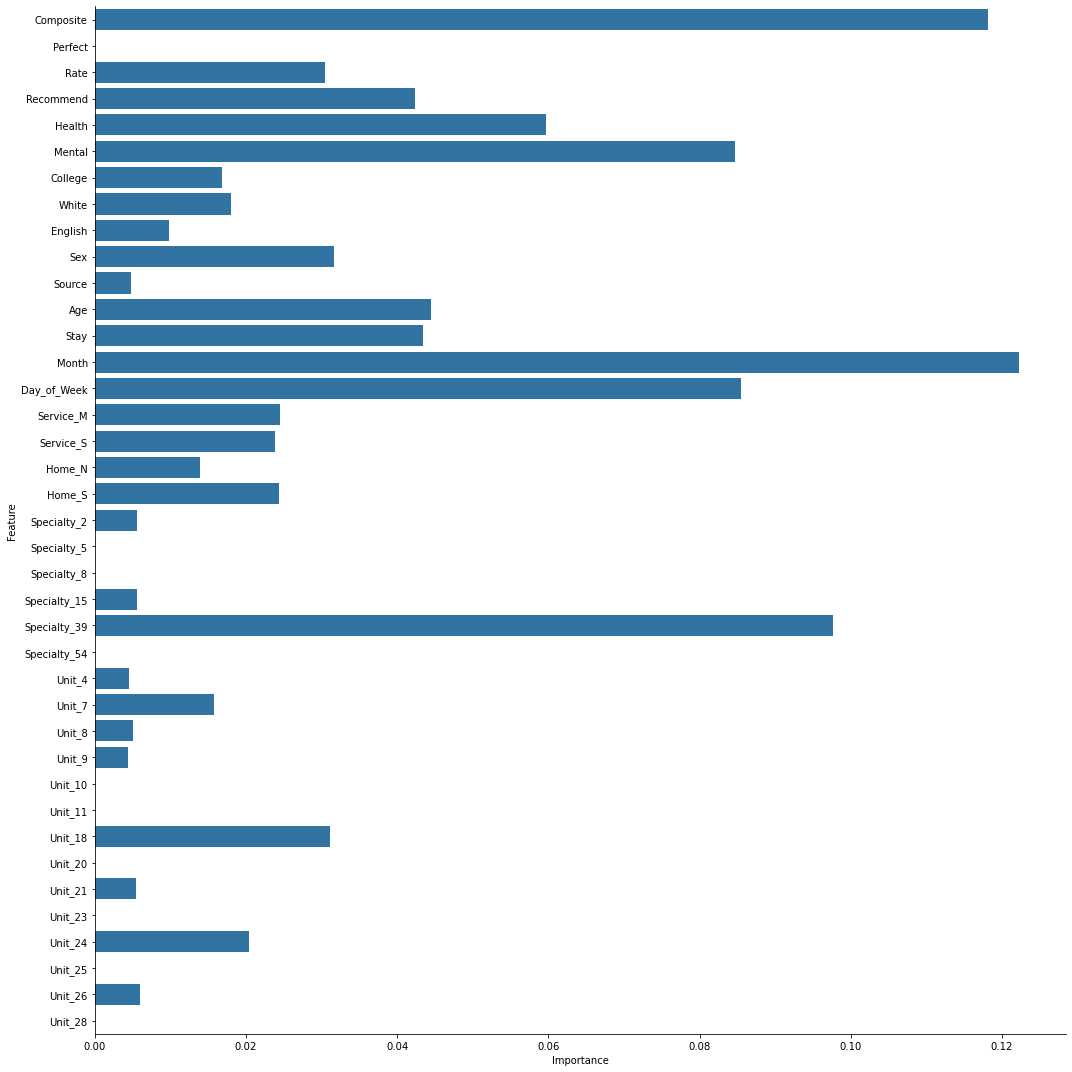

In [90]:
dtc_features = pd.DataFrame()
dtc_features['Feature'] = X_train.columns.tolist()
dtc_features['Importance'] = dtc.feature_importances_
sns.catplot(y='Feature', x='Importance', data=dtc_features, kind='bar', height=15, color=base_color)
plt.show()

### Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [93]:
model={'Model': 'RandomForest'}
model['Accuracy'] = accuracy_score(y_test, rfc.predict(X_test))
model['Precision'] = precision_score(y_test, rfc.predict(X_test))
model['F1-Score'] = f1_score(y_test, rfc.predict(X_test))
Performances.append(model)

In [94]:
confusion_matrix(y_test, rfc.predict(X_test))

array([[158,  23],
       [ 71,  33]])

In [95]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       181
           1       0.59      0.32      0.41       104

    accuracy                           0.67       285
   macro avg       0.64      0.60      0.59       285
weighted avg       0.65      0.67      0.64       285



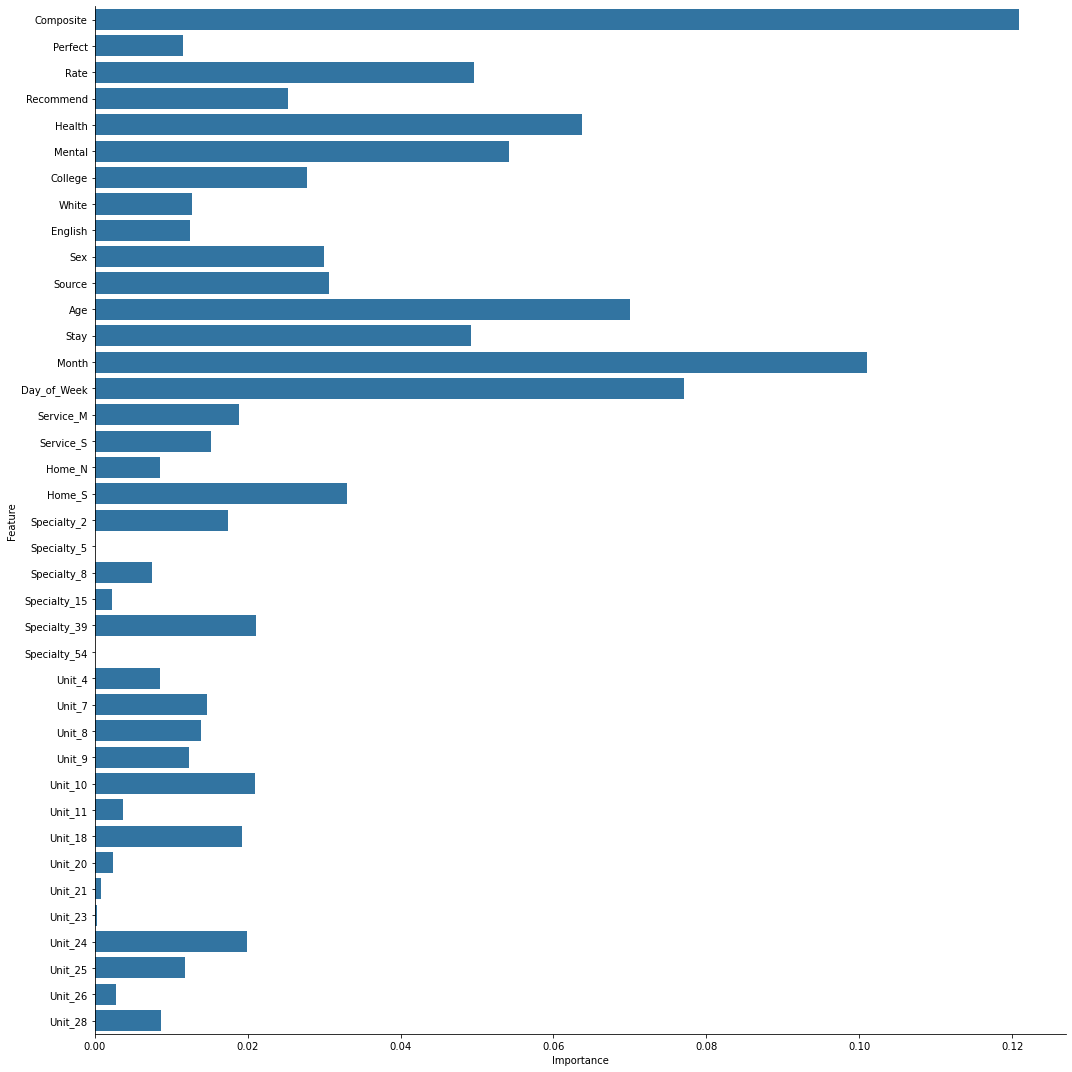

In [96]:
rfc_features = pd.DataFrame()
rfc_features['Feature'] = X_train.columns.tolist()
rfc_features['Importance'] = rfc.feature_importances_
sns.catplot(y='Feature', x='Importance', data=rfc_features, kind='bar', height=15, color=base_color)
plt.show()

### XGBoost

In [97]:
from xgboost import XGBClassifier

In [98]:
xgb = XGBClassifier(n_estimators=100,random_state=0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [99]:
model={'Model': 'XGBoost'}
model['Accuracy'] = accuracy_score(y_test, xgb.predict(X_test))
model['Precision'] = precision_score(y_test, xgb.predict(X_test))
model['F1-Score'] = f1_score(y_test, xgb.predict(X_test))
Performances.append(model)

In [100]:
confusion_matrix(y_test, xgb.predict(X_test))

array([[147,  34],
       [ 66,  38]])

In [101]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75       181
           1       0.53      0.37      0.43       104

    accuracy                           0.65       285
   macro avg       0.61      0.59      0.59       285
weighted avg       0.63      0.65      0.63       285



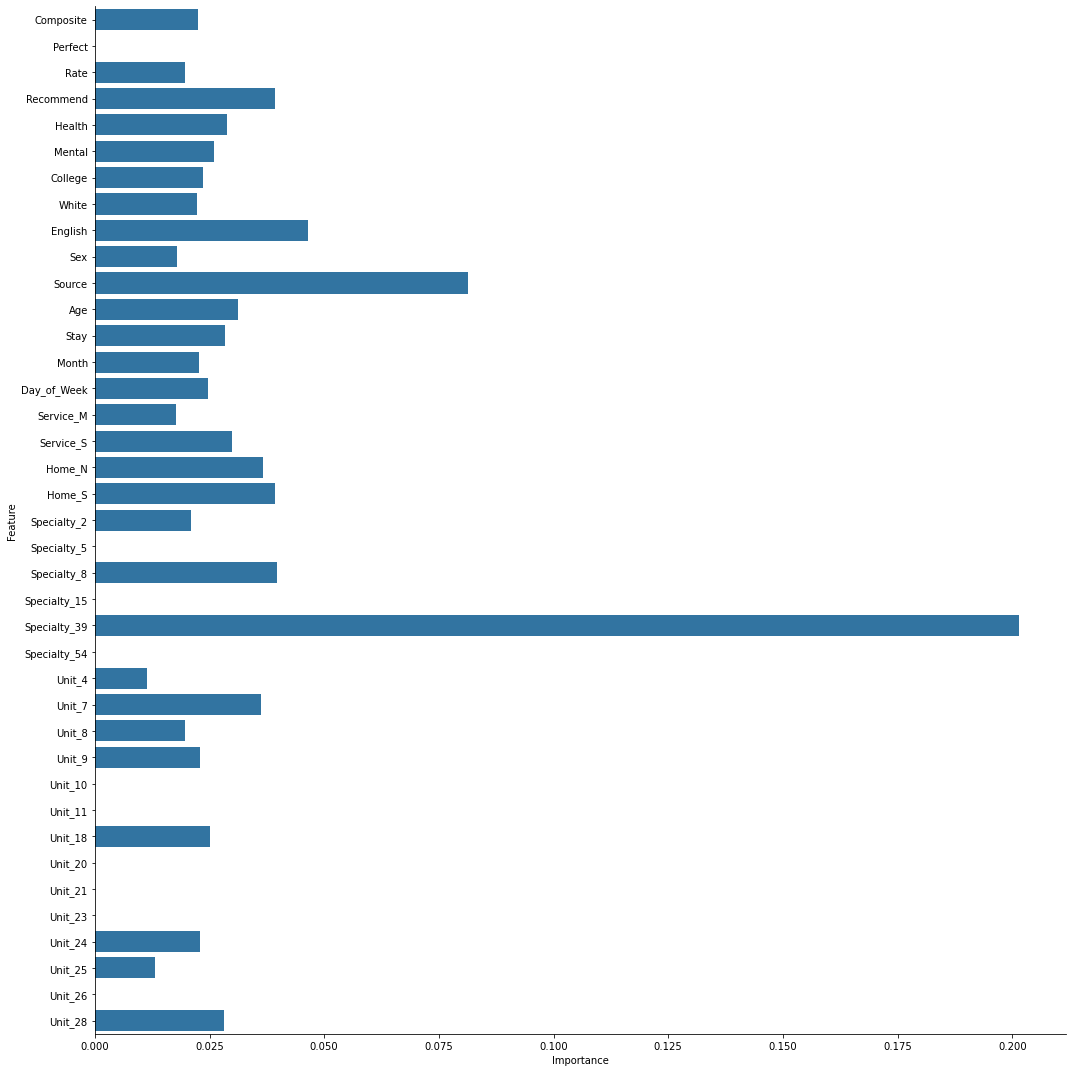

In [102]:
xgb_features = pd.DataFrame()
xgb_features['Feature'] = X_train.columns.tolist()
xgb_features['Importance'] = xgb.feature_importances_
sns.catplot(y='Feature', x='Importance', data=xgb_features, kind='bar', height=15, color=base_color)
plt.show()

### CatBoost

In [103]:
from catboost import CatBoostClassifier

In [104]:
cb = CatBoostClassifier(n_estimators=2500, random_state=0)
cb.fit(X_train, y_train)

Learning rate set to 0.003736
0:	learn: 0.6917757	total: 54.9ms	remaining: 2m 17s
1:	learn: 0.6903920	total: 56.9ms	remaining: 1m 11s
2:	learn: 0.6888171	total: 58.6ms	remaining: 48.8s
3:	learn: 0.6872559	total: 60.3ms	remaining: 37.6s
4:	learn: 0.6859331	total: 62ms	remaining: 31s
5:	learn: 0.6846569	total: 63.8ms	remaining: 26.5s
6:	learn: 0.6833147	total: 66ms	remaining: 23.5s
7:	learn: 0.6820860	total: 68ms	remaining: 21.2s
8:	learn: 0.6808877	total: 70.1ms	remaining: 19.4s
9:	learn: 0.6797505	total: 72.2ms	remaining: 18s
10:	learn: 0.6785129	total: 74.2ms	remaining: 16.8s
11:	learn: 0.6772420	total: 76.1ms	remaining: 15.8s
12:	learn: 0.6760329	total: 78ms	remaining: 14.9s
13:	learn: 0.6749963	total: 79.6ms	remaining: 14.1s
14:	learn: 0.6735689	total: 81.2ms	remaining: 13.5s
15:	learn: 0.6723208	total: 83ms	remaining: 12.9s
16:	learn: 0.6709080	total: 84.7ms	remaining: 12.4s
17:	learn: 0.6697378	total: 88.3ms	remaining: 12.2s
18:	learn: 0.6687114	total: 90.1ms	remaining: 11.8s
19:	

In [105]:
model={'Model': 'CatBoost'}
model['Accuracy'] = accuracy_score(y_test, cb.predict(X_test))
model['Precision'] = precision_score(y_test, cb.predict(X_test))
model['F1-Score'] = f1_score(y_test, cb.predict(X_test))
Performances.append(model)

In [106]:
confusion_matrix(y_test, cb.predict(X_test))

array([[160,  21],
       [ 64,  40]])

In [107]:
print(classification_report(y_test, cb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       181
           1       0.66      0.38      0.48       104

    accuracy                           0.70       285
   macro avg       0.69      0.63      0.64       285
weighted avg       0.69      0.70      0.68       285



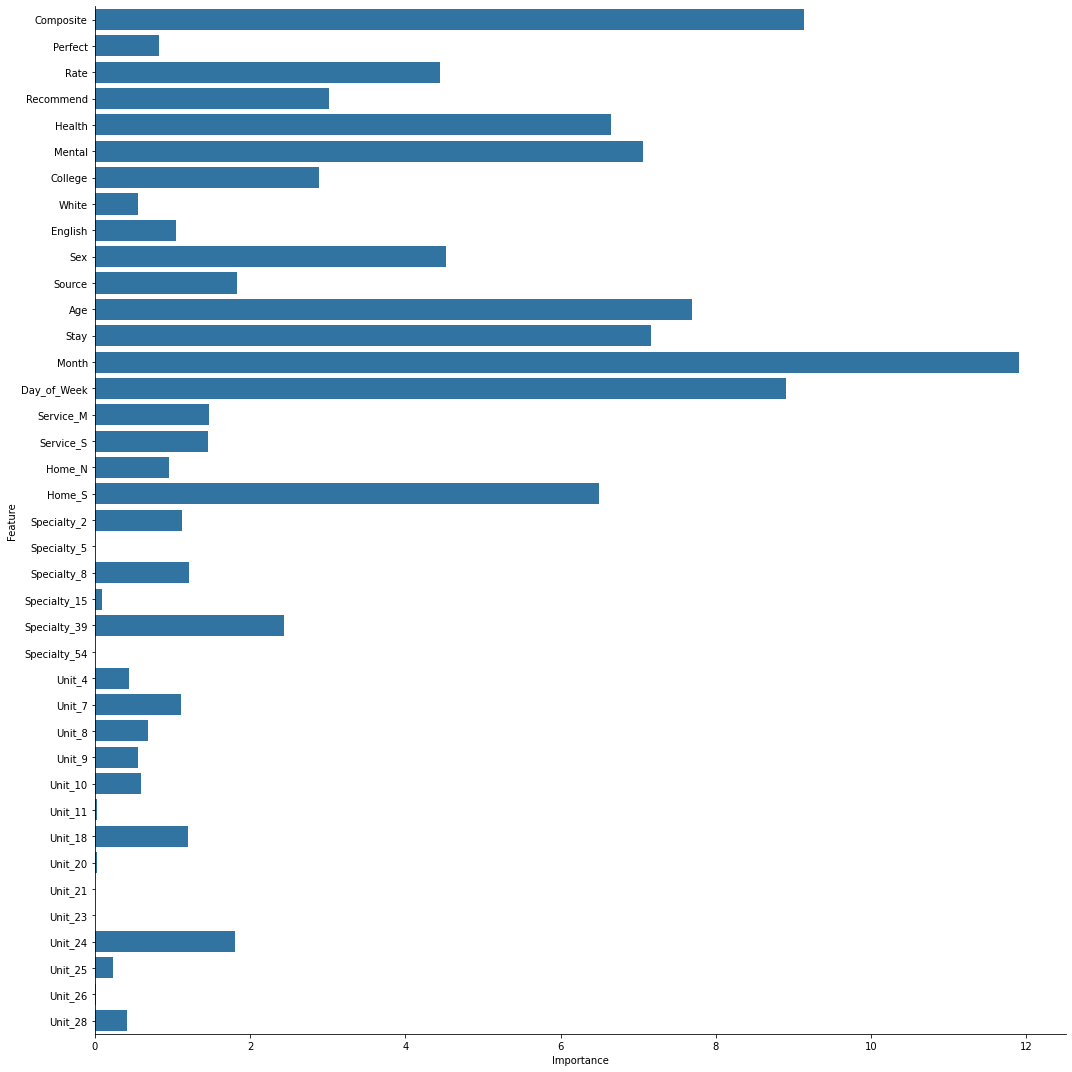

In [108]:
cb_features = pd.DataFrame()
cb_features['Feature'] = X_train.columns.tolist()
cb_features['Importance'] = cb.feature_importances_
sns.catplot(y='Feature', x='Importance', data=cb_features, kind='bar', height=15, color=base_color)
plt.show()

### Models Comparaison:

In [109]:
pd.DataFrame(Performances)

,Model,Accuracy,Precision,F1-Score
0,DecisionTree,0.649123,0.520833,0.500000
1,RandomForest,0.670175,0.589286,0.412500
2,XGBoost,0.649123,0.527778,0.431818
3,CatBoost,0.701754,0.655738,0.484848


From the obtained table we can see that the CatBoost is the best method in terms of accuracy and precision. However, in terms of F1-Score of the class Visit=1 it has the second best value after the Decision Tree. If we compare the macro average of the F1-Score on the two classes we can see that the CatBoost (0.64) is better that the Decision Tree (0.61). This information is obtained from the classification reports. 

Lets see if the same results are obtained from the ROC Curves.

### ROC Curves: 

In [110]:
fpr_RFC, tpr_RFC, _ = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
roc_auc_RFC = auc(fpr_RFC, tpr_RFC)
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)
fpr_XGB, tpr_XGB, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
roc_auc_XGB = auc(fpr_XGB, tpr_XGB)
fpr_CAT, tpr_CAT, _ = roc_curve(y_test, cb.predict_proba(X_test)[:,1])
roc_auc_CAT = auc(fpr_CAT, tpr_CAT)

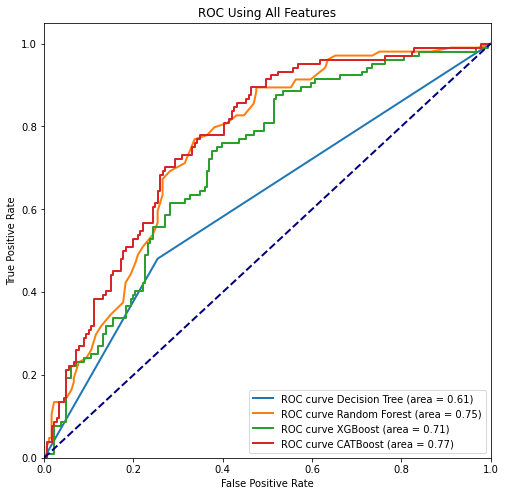

In [111]:
plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr_dtc, tpr_dtc, 
         lw=lw, label='ROC curve Decision Tree (area = %0.2f)' % roc_auc_dtc)
plt.plot(fpr_RFC, tpr_RFC, 
         lw=lw, label='ROC curve Random Forest (area = %0.2f)' % roc_auc_RFC)
plt.plot(fpr_XGB, tpr_XGB, 
         lw=lw, label='ROC curve XGBoost (area = %0.2f)' % roc_auc_XGB)
plt.plot(fpr_CAT, tpr_CAT, 
         lw=lw, label='ROC curve CATBoost (area = %0.2f)' % roc_auc_CAT)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Using All Features')
plt.legend(loc="lower right")
plt.show()

Using the ROC curve to select the best model is quite easy. We search for the model that goes rapidly to the top and the one with the higher curve and the highest area under curve. According to these criteria, we can conclude that the CatBoost model is the best.

From the table of models' performances and the ROC curves, we can conclude that the **CatBoost** model is the most suitable model for this application.